In [33]:
import matplotlib
from datascience import *
%matplotlib inline
import matplotlib.pyplot as plots
import numpy as np
plots.style.use('fivethirtyeight')

import warnings
warnings.simplefilter(action='ignore')

## Distribution of the Sample Average

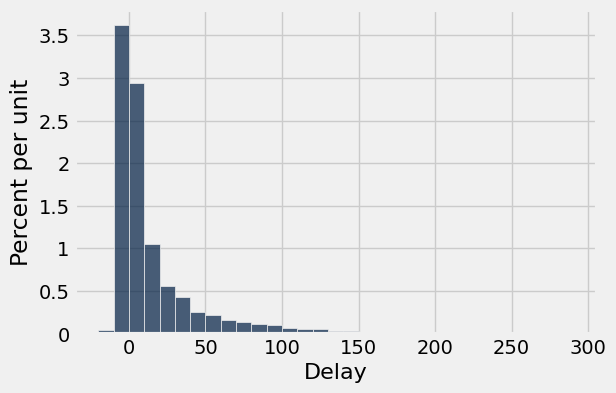

In [34]:
united = Table.read_table('united.csv')
united_bins = np.arange(-20, 300, 10)
united.hist('Delay', bins=united_bins)

In [35]:
delays = united.column('Delay')
population_mean = np.mean(delays)
population_sd = np.std(delays)
population_mean, population_sd

(16.658155515370705, 39.480199851609314)

In [36]:
def one_sample_mean(sample_size):
    """Take a sample from the population of flights and compute its mean"""
    sampled_flights = united.sample(sample_size)
    return np.mean(sampled_flights.column('Delay'))

In [37]:
def ten_thousand_sample_means(sample_size):
    """Approximate the distribution of the sample mean"""
    means = make_array()
    for i in np.arange(10000):
        mean = one_sample_mean(sample_size)
        means = np.append(means, mean)
    return means

Population Average: 16.6581555154


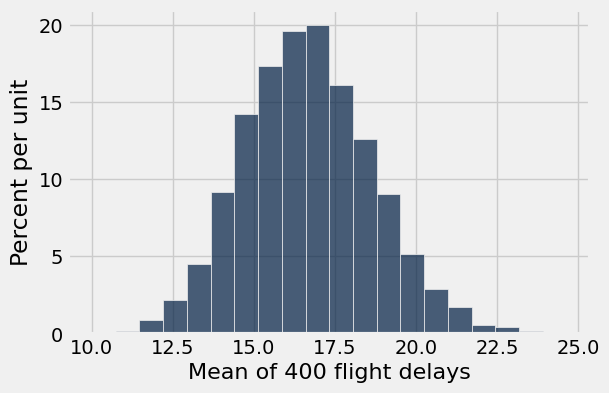

In [38]:
sample_means_400 = ten_thousand_sample_means(400)
Table().with_column('Mean of 400 flight delays', sample_means_400).hist(bins=20)
print('Population Average:', population_mean)

How many possible ways are there that the sample could have come out?

In [39]:
united.num_rows

13825

In [40]:
# How many possible sample means are there?
united.num_rows ** 400

1845253300060122534684058597421182951017338738756884128476156537109395559702295050837795610986469015706417701209704203890696502616877632733167737247128710898267622177602279004150237321497531712957437744194467949953310673085563343687922543234838511385550568262088418334016217887061735745358842456577208939555740404373614633941136938352510678553686140728842897559436843191863609514780562396147921834537075860636817493656816017587537752125750151805566479543166742758254440594398100342650860455445795087942680221047750947255562969782801791748639952850756659518870235020316513575934561122027710440608023538776721761349403194150575014182981349346980577699633375066811153948871815566280319121565243984196831524157664160526536071758298269096548661601001356951548310460921171197940711389849058290284443729287317331793254191518876765178731748453564076631795997590039640387156475975294002056115371653663653810384491550154761367793765502453546587829476276348569091617961438914859251316410793595152416543512156519

In [41]:
sample_means_900 = ten_thousand_sample_means(900)

In [42]:
means_tbl = Table().with_columns(
    '400', sample_means_400,
    '900', sample_means_900,
)

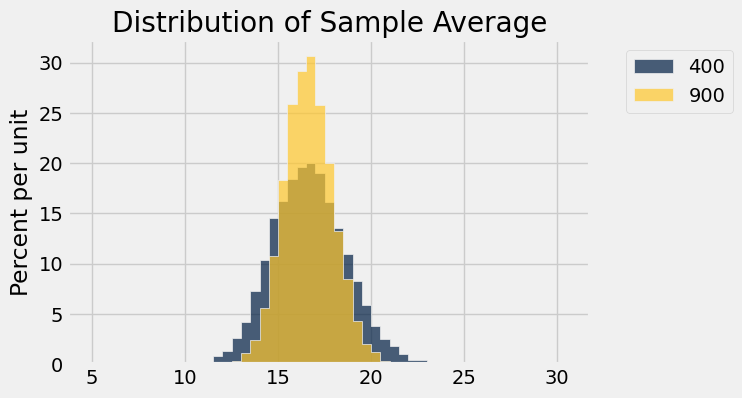

In [43]:
means_tbl.hist(bins = np.arange(5, 31, 0.5))
plots.title('Distribution of Sample Average');

### Relationship Between Population SD and Sample Size

In [44]:
"""Empirical distribution of random sample means"""
def plot_sample_means(sample_size):
    sample_means = ten_thousand_sample_means(sample_size)
    sample_means_tbl = Table().with_column('Sample Means', sample_means)
    
    # Print some information about the distribution of the sample means
    print("Sample size: ", sample_size)
    print("Population mean:", population_mean)
    print("Average of sample means: ", np.mean(sample_means))
    print("Population SD:", population_sd)
    print("SD of sample means:", np.std(sample_means))

    # Plot a histogram of the sample means
    sample_means_tbl.hist(bins=20)
    plots.xlabel('Sample Means')
    plots.title('Sample Size ' + str(sample_size))

Sample size:  100
Population mean: 16.6581555154
Average of sample means:  16.641675
Population SD: 39.4801998516
SD of sample means: 3.97949800407


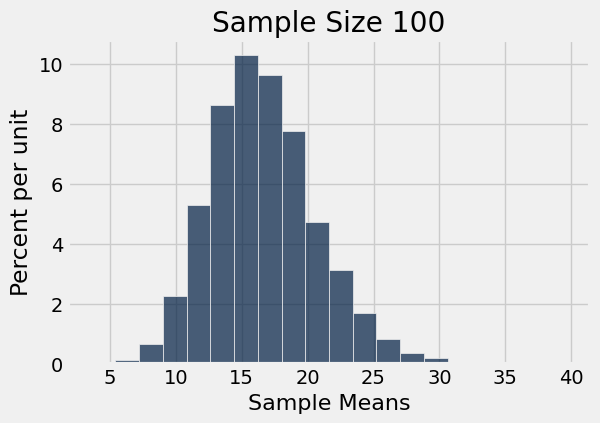

In [45]:
plot_sample_means(100)

In [46]:
39.48 / 3.932

10.040691759918616

Sample size:  400
Population mean: 16.6581555154
Average of sample means:  16.653594
Population SD: 39.4801998516
SD of sample means: 1.97366342734


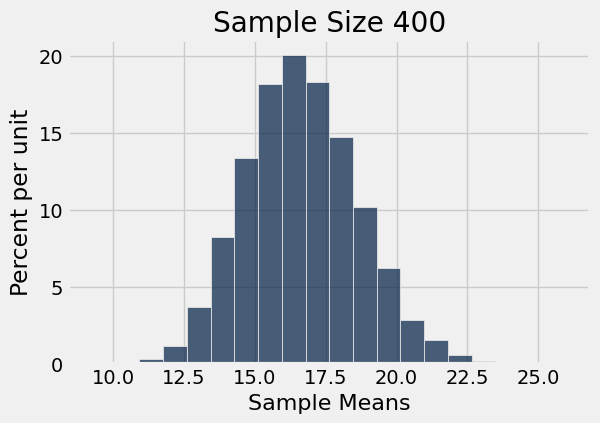

In [47]:
plot_sample_means(400)

In [48]:
39.48 / 1.973

20.010136847440442

Sample size:  625
Population mean: 16.6581555154
Average of sample means:  16.63161648
Population SD: 39.4801998516
SD of sample means: 1.56065017101


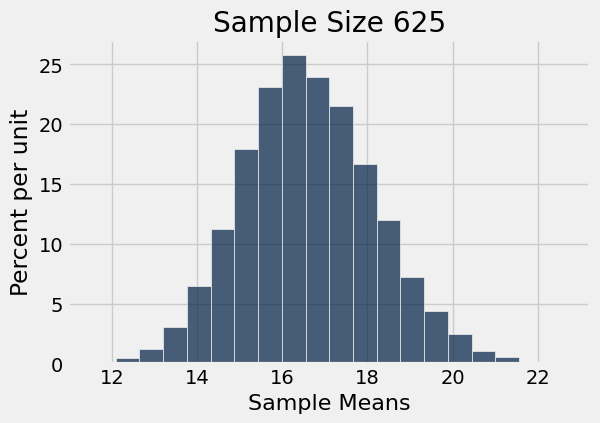

In [49]:
plot_sample_means(625)

In [50]:
39.48 / 1.587

24.87712665406427

In [51]:
39.48 / np.sqrt(100)

3.9479999999999995

In [52]:
39.48 / np.sqrt(400)

1.9739999999999998

In [53]:
39.48 / np.sqrt(625)

1.5791999999999999

## Variability of the Sample Mean

In [54]:
# Warning: this cell will take a long time to run!
sample_sizes = np.arange(100, 950, 50)

sample_mean_sds = make_array()
for n in sample_sizes:
    sample_means = ten_thousand_sample_means(n)
    sample_mean_sds = np.append(sample_mean_sds, np.std(sample_means))

In [55]:
sd_table = Table().with_columns(
    'Sample size', sample_sizes,
    'SD of simulated sample means', sample_mean_sds,
    'Pop SD / sqrt(sample size)', population_sd / np.sqrt(sample_sizes),
)
sd_table.show()

Sample size,SD of simulated sample means,Pop SD / sqrt(sample size)
100,3.96364,3.94802
150,3.1958,3.22354
200,2.79959,2.79167
250,2.49105,2.49695
300,2.29606,2.27939
350,2.10768,2.11031
400,1.96137,1.97401
450,1.86109,1.86111
500,1.76956,1.76561
550,1.68819,1.68344


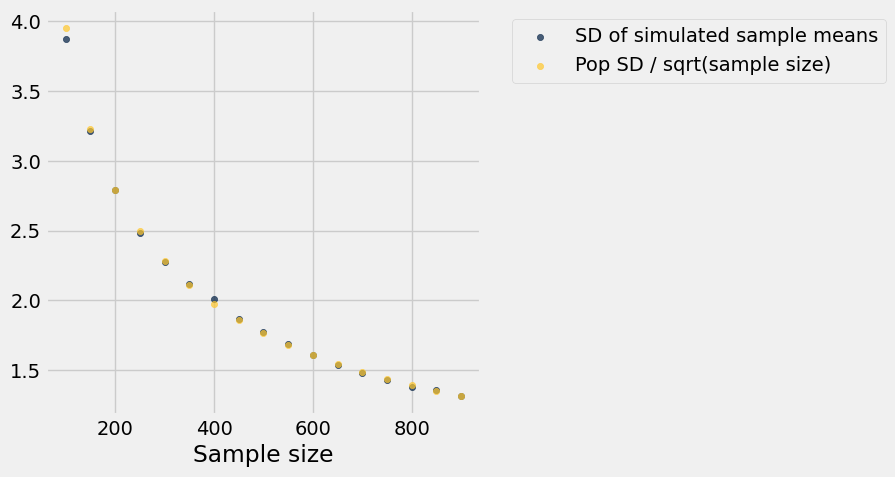

In [24]:
sd_table.scatter('Sample size')

## SD of Sample Means ##

$$\text{SD of all possible sample means} = \frac{\text{Population SD}}{\sqrt{\text{sample size}}}$$

## Choosing a Sample Size ##

Candidate A is contesting an election. A polling organization wants to estimate the proportion of voters who will vote for her. How can they decide **how large their sample should be** to get a desired level of accuracy?

Desired accuracy: 95% confidence interval of width no more than one percentage point

For example: "I am 95% confident that my share of the votes will be between 53% and 54%."

### Facts we know about sample means ###
1. Sample means are always normally distributed. (Central Limit Theorem)
2. For normal distributions, the interval $[\mu - 2\sigma, \mu + 2\sigma]$ captures approximately 95% of the data. (95% confidence)
3. $\text{SD of all possible sample means} = \frac{\text{Population SD}}{\sqrt{\text{sample size}}}$

### Bounding SD of Sample Means ###
For the simulated distribution, we want the length of $[\mu - 2\sigma, \mu + 2\sigma]$ to be at most 0.01. In other words, we want
$$
4 \sigma \leq 0.01
$$
or
$$
4 \times \frac{\text{Population SD}}{\sqrt{\text{sample size}}} \leq 0.01.
$$
Solving for sample size gives
$$
(400 \times \text{Population SD})^2 \leq \text{sample size}.
$$

### How Big Can Population SD Be? ###

The voting data is all 0 (against) or 1 (for). The most spread out it can possibly be is equally split, in which case the mean is 0.5 and every vote differs from the mean by 0.5 (either 0 - 0.5 or 1 - 0.5). The standard deviation is therefore at most:
$$
\sqrt{\frac{1}{n}\sum_{i = 1}^n (x_i - \mu)^2} = \sqrt{\frac{1}{n}\sum_{i = 1}^n 0.5^2} = \sqrt{\frac{1}{n} \cdot n \cdot 0.5^2} = \sqrt{0.5^2} = 0.5
$$
We can finally conclude that our sample should be at least as large as:
$$\text{sample size} \geq (400 \times 0.5)^2 = 40,000$$